In [13]:
import numpy as np
import random
import math
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy import stats

In [25]:
# Problem setup
n = 1000 #Size of each $X_1$ and $X_2$
theta = 0.3 #fraction of overlap (We need to estimate this)
stringSize = int((2-theta)*n) #The length of $X$
string2_start = int((1-theta)*n) #Starting point of $X_2$
TotalStringsGenerated = 10 #Number Of Strings $X$ we generate
NumOfMasks = 50 #Number of lexicographic orderings we generate, The parameter u in the paper
PositionBitTruncation = 50 #Truncation of bit representation of starting location, parameter v in paper

In [26]:
# Generate sequences to estimate the rate-distortion pair later
string_set = []; #Array that holds $TotalStringsGenerated$ number of strings of length $(2-\theta)n$
string1_set = []; #Array that holds first extracted of string of size n
string2_set = []; #Array that holds second extracted of string of size n
for i in range(TotalStringsGenerated): #Creates random $Bern(1/2)$ strings $(X's)$ and extracts $X_1$ and $X_2$ from them
    string = np.random.binomial(size = stringSize,n=1,p=0.5);
    string =''.join(map(str, string));
    string1 = string[0:n];
    string2 = string[string2_start:stringSize];
    string_set.append(string);
    string1_set.append(string1);
    string2_set.append(string2);

In [27]:
# Function to Generate masks
def ObtainMasks(stringSize,NumberOfMasks):
    mask = []
    for i in range(NumberOfMasks):
        temp_mask = np.random.binomial(size = stringSize,n=1,p=0.5); #Just a binary string randomly generated
        temp_mask =''.join(map(str, temp_mask));
        mask.append(temp_mask)
    mask = np.array(mask)
    return mask 

In [28]:
def xor(String1, String2):
    Output = ""
     
    # Loop to iterate over the
    # Binary Strings
    for i in range(min(len(String1),len(String2))):
         
        # If the Character matches
        if (String1[i] == String2[i]):
            Output += '0'
        else:
            Output += '1'
    return Output

In [29]:
# Function to return the decimal of the lexicographic first suffix string for a mask and string
def MaskBasedLexicographicFirst(String,Mask): #String and Mask are of same size
    suffixes = np.array([]) #Array that stores Suffixes of all these strings
    for i in range(len(String)): #Stores every suffix of String
        suffixes = np.append(suffixes,String[i:len(String)])
    masked_suffixes = np.array([])
    for i in range(len(String)):
        masked_suffixes= np.append(masked_suffixes,xor(suffixes[i],Mask)+"a"); # a is just used as a last priority addition
    masked_suffixes.sort();
    return(len(String) - len(masked_suffixes[0])+2)
    
        

In [30]:
# Function that truncates strings
def Truncation(stringSize1,Position,BitTruncation): #Takes input as the Position, and the amount it is truncated (2^{BitTruncation would be the denominator})
        return (np.floor((Position/stringSize1)*(2**(BitTruncation)))/2**(BitTruncation))

In [31]:
# function to obtain sketches based on location hashing
def ObtainLocationalSketches(String1,String2,StringSize1,SketchSize,alpha_0): #Sketch size is B and alpha_0 = min(theta)/(2-min(theta))
    mask = ObtainMasks(len(String1),int(np.sqrt(SketchSize)));
    SketchesOne = np.array([]); #Arrays used to store sketches
    SketchesTwo = np.array([]);
    for i in range(len(mask)):
        positionone = MaskBasedLexicographicFirst(String1,mask[i]);
        positiontwo = MaskBasedLexicographicFirst(String2,mask[i]);
        positionone = Truncation(StringSize1,positionone,int(np.sqrt(SketchSize)));
        positiontwo = Truncation(StringSize1,positiontwo,int(np.sqrt(SketchSize)));
        SketchesOne = np.append(SketchesOne,positionone);
        SketchesTwo = np.append(SketchesTwo,positiontwo);
    return [SketchesOne,SketchesTwo]

In [32]:
x = ObtainLocationalSketches(string1_set[0],string2_set[0],n,300,0.05)

In [33]:
#Get rate distortion pair
def RateDistortionPair(theta,String1,String2,StringSize1,SketchSize,alpha_0):
    temp = ObtainLocationalSketches(String1,String2,StringSize1,SketchSize,alpha_0);
    temp1 = stats.mode(1-(temp[0]-temp[1]));
    theta_hat = temp1[0][0]
    Distortion = (theta-theta_hat)**2
    return([SketchSize,Distortion])

In [34]:
Rate_DistortionPair_stringset = []
for j in range(TotalStringsGenerated): #For each string
    Rate_DistortionPair_set = []
    for i in range(100,110): #Max rate B in the range 
        Rate_DistortionPair_set.append(RateDistortionPair(theta,string1_set[j],string2_set[j],n,i,0));
    Rate_DistortionPair_stringset.append(Rate_DistortionPair_set);
    print("yo")

yo
yo
yo
yo
yo
yo
yo
yo
yo
yo


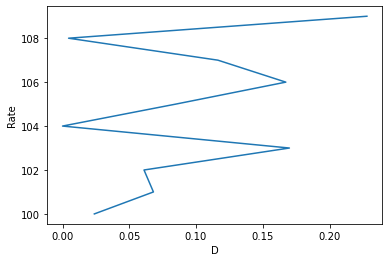

In [35]:
AvgRate_DistortionPair_set = np.mean(Rate_DistortionPair_stringset,axis=0)

yy = [x[1] for x in AvgRate_DistortionPair_set]

xx = [x[0] for x in AvgRate_DistortionPair_set]

fig, ax = plt.subplots()  # Create a figure containing a single axes.
ax.set_xlabel("D")
ax.set_ylabel("Rate")
ax.plot(yy,xx);  # Plot some data on the axes.